Plot the outcome of simulations exploring the role of $\beta$ in the magnetisation markup on the Pokec social network.

Created on: 10/02/21

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib
import pylab
import itertools

In [2]:
eval_data=pd.read_csv("Data/Pokec_control_eval_data_g5_beta_impact.csv")
eval_data

,Unnamed: 0,control,magnetisation,mag_se,beta_factor,gradient
0,0,no con,0.034910,0.000014,1.0,5.0
1,1,unif,0.052924,0.000032,1.0,5.0
2,2,full,0.054025,0.000024,1.0,5.0
3,3,block,0.049226,0.000023,1.0,5.0
4,4,sv,0.039152,0.000027,1.0,5.0
...,...,...,...,...,...,...
513,2,full,-0.234942,0.000007,9.0,5.0
514,3,block,-0.266596,0.000011,9.0,5.0
515,4,sv,-0.261003,0.000010,9.0,5.0
516,5,nc,-0.269424,0.000014,9.0,5.0


In [3]:
control_names = ['block','full','nc','sv','snapshot']
eval_data['Sample_index'] = eval_data.reset_index().reset_index().groupby(by=['control','gradient','beta_factor'])['level_0'].transform(lambda x: x.rank())

pivotted = pd.pivot_table( eval_data , values=['magnetisation'],columns=['control'] ,index=['beta_factor','gradient','Sample_index'],aggfunc={'magnetisation':np.mean} ).reset_index()
pivotted.columns=pivotted.columns.map('_'.join)
for k in control_names :
    pivotted[f"markup_{k}"] = pivotted[f'magnetisation_{k}'] - pivotted['magnetisation_unif']

grouped = pivotted.groupby(['beta_factor_','gradient_']).agg({f'markup_{k}':[np.mean,stats.sem] for k in control_names}).reset_index()
grouped.columns=grouped.columns.map('_'.join)
grouped.head()

,beta_factor__,gradient__,markup_block_mean,markup_block_sem,markup_full_mean,markup_full_sem,markup_nc_mean,markup_nc_sem,markup_sv_mean,markup_sv_sem,markup_snapshot_mean,markup_snapshot_sem
0,1.0,5.0,-0.001056,0.002474,0.000761,0.002520,0.001203,0.002266,-0.001036,0.003147,0.000980,0.002907
1,3.0,5.0,0.005699,0.002973,0.015883,0.003378,0.005012,0.002720,0.006034,0.003071,0.005880,0.003371
2,5.0,5.0,0.002808,0.002938,0.017728,0.001959,-0.002754,0.002070,0.003494,0.002157,0.001401,0.002809
3,7.0,5.0,0.001283,0.002673,0.028097,0.002497,-0.002883,0.001679,0.004614,0.002421,0.004036,0.001945
4,9.0,5.0,0.001264,0.001880,0.036363,0.002293,-0.003871,0.001898,0.008497,0.002916,0.003118,0.002431


Text(-1.5, 0.035, '(b)')

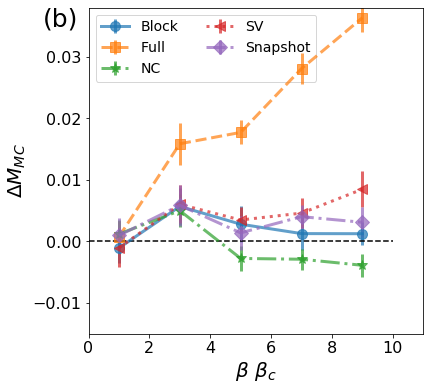

In [4]:
gradient = list(grouped['beta_factor__'])

# Select colours scheme:
cmap = pylab.cm.get_cmap("tab10", 6)    # PiYG
#hex_codes = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in  range(cmap.N)]
hex_codes  = [matplotlib.colors.rgb2hex(pal) for pal in  sns.color_palette()]
col= itertools.cycle(tuple(hex_codes))
marker_styles = itertools.cycle(('o','s','*','<',"D","P"))
line_styles = itertools.cycle(('-', '--', '-.', ':','-.'))


def name_map(label) :
    """
    Upper case SV and NC.
    
    .title() to other labels
    """
    if len(label) < 3 :
        return label.upper()
    else :
        return label.title()

fig,ax=plt.subplots(figsize=(6,6))

for con in control_names :
    mean_markup = list(grouped[f'markup_{con}_mean'])
    sem_markup = list(grouped[f'markup_{con}_sem'])
    col_current=next(col)
    plt.errorbar(gradient,mean_markup,yerr=sem_markup,label=name_map(con)
                 ,mfc=f'{col_current}',mec=f'{col_current}',
                 color=f'{col_current}',
                 marker=f'{next(marker_styles)}',
                linestyle=f'{next(line_styles)}',alpha=0.7,markersize=10,lw=3.0)

plt.plot([0,10],[0,0],'k--')

plt.xlabel("$\\beta \\ \\beta_c $",fontsize=20)
plt.ylabel("$\Delta M_{MC}$",fontsize=20 )
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.legend(fontsize=14,ncol=2,loc='upper left')
ax.legend(fontsize=14,ncol=2,loc='upper left').set_zorder(0)
plt.xlim(0,11)
#plt.xlim(-1,1)

plt.ylim(-0.015,0.038)

plt.text(-1.5,0.035,'(b)',fontsize=25)